In [1]:
import random
import os

import matplotlib.pyplot as plt
import numpy as np
import torch

from src.data.augmenters import NoAugmenter, EigenAugmenter, MyAugmenter
from src.data.patch_samplers import NoPatchSampler, EigenPatchSampler, MyPatchSampler
from src.data.kitti_raw import KITTIRAWDataset

from src.models import CoarseFine
from src.models import MyModel

In [2]:
kitti_path: str = '/media/antonio/523f31c5-dc82-4dce-8457-65b5dd1f19e4/kitti'

In [3]:
dataset = KITTIRAWDataset(
        NoAugmenter(),
        NoPatchSampler(),
        kitti_path,
        'train',
        'png',
)

In [4]:
model = CoarseFine()
#checkpoint_path = os.path.join("experiments", "eigen","checkpoints","model_6.pth")
#model.load_state_dict(torch.load(checkpoint_path))

<All keys matched successfully>

depth map ranges in 0.00, 72.86
predicted depth map ranges in 1.91, 23.01

depth map ranges in 0.00, 79.60
predicted depth map ranges in 1.86, 26.78

depth map ranges in 0.00, 69.66
predicted depth map ranges in 1.77, 20.05



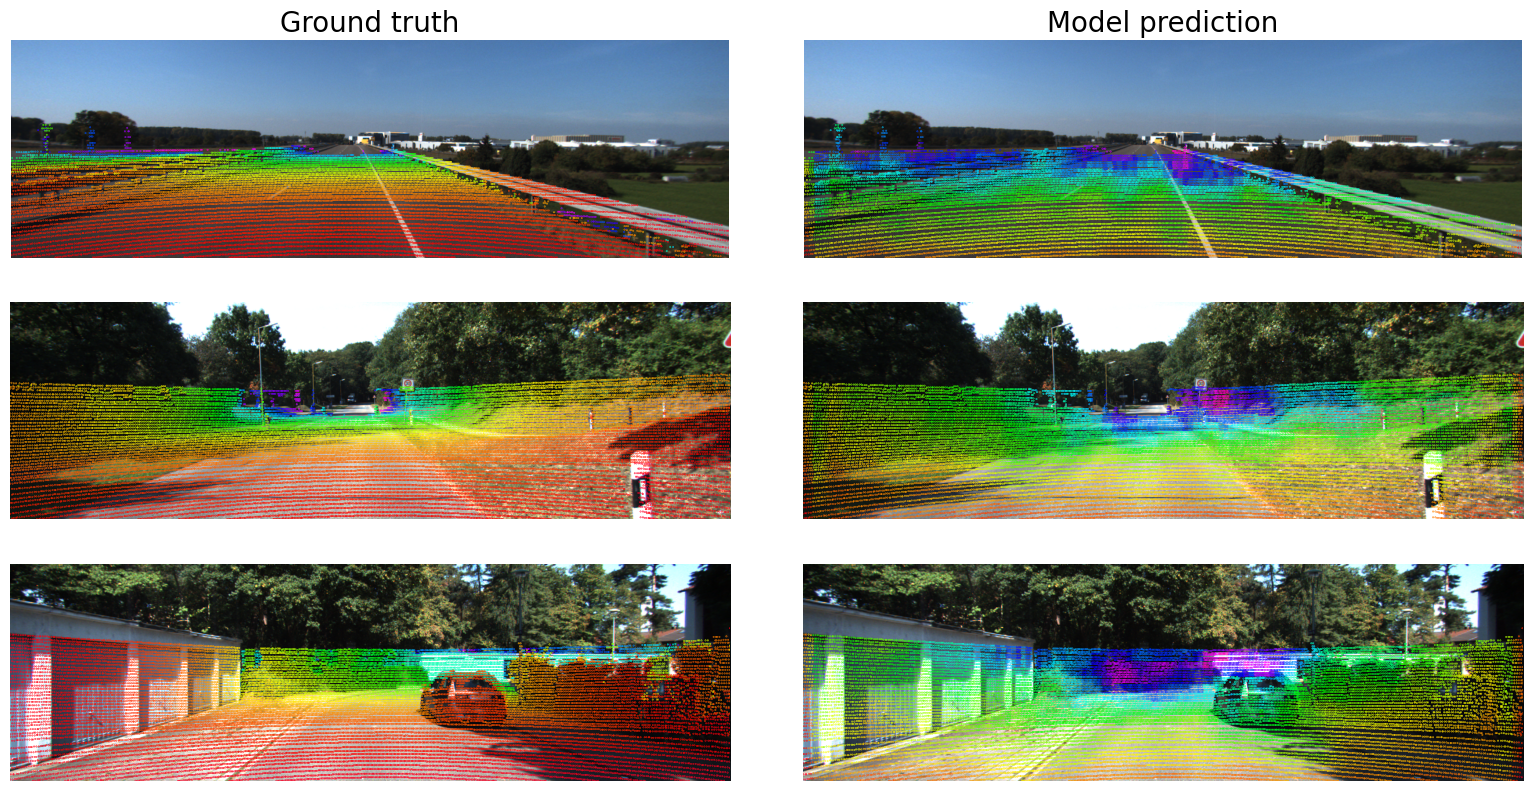

In [6]:
indices = random.choices(range(len(dataset)), k=6)
fig, axes = plt.subplots(3, 2, figsize=(16, 8))
plt.tight_layout()

axes[0, 0].set_title("Ground truth", fontsize=20)
axes[0, 1].set_title("Model prediction", fontsize=20)
for i in range(3):
    image, depth_map, camera_parameters = dataset[indices[i]]

    np_image = image[0].permute(1, 2, 0).numpy()
    np_depth_map = depth_map[0, 0].numpy()

    yy, xx = np.nonzero(np_depth_map)

    axes[i, 0].axis("off")
    axes[i, 0].imshow(np_image)
    axes[i, 0].scatter(xx, yy, c=np_depth_map[yy, xx], s=0.1, cmap="gist_rainbow")

    model.eval()
    with torch.no_grad():
        pred = model(image, camera_parameters)
    np_pred = pred[0, 0].numpy()
    print(f"depth map ranges in {np_depth_map.min():.2f}, {np_depth_map.max():.2f}")
    print(f"predicted depth map ranges in {np_pred.min():.2f}, {np_pred.max():.2f}\n")

    axes[i, 1].axis("off")
    axes[i, 1].imshow(np_image)
    axes[i, 1].scatter(xx, yy, c=np_pred[yy, xx], s=0.1, cmap="gist_rainbow")

plt.show()